In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [2]:
import pandas as pd

df = pd.read_csv('NFLX.csv')
df = df[['Close']]

close_real_prices = df.values
print(df)

           Close
0     254.259995
1     265.720001
2     264.559998
3     250.100006
4     249.470001
...          ...
1004  427.140015
1005  457.130005
1006  429.480011
1007  405.600006
1008  410.170013

[1009 rows x 1 columns]


In [3]:


def window_df(df, n):
    windowed_df = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_df[f'Target-{i}'] = df['Close'].shift(i)
    windowed_df['Target'] = df['Close']
    return windowed_df.dropna()

window = 150
df_window = window_df(df, window)

C:\Users\mikol\AppData\Local\Temp\ipykernel_31952\3236221994.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  windowed_df[f'Target-{i}'] = df['Close'].shift(i)
C:\Users\mikol\AppData\Local\Temp\ipykernel_31952\3236221994.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  windowed_df[f'Target-{i}'] = df['Close'].shift(i)
C:\Users\mikol\AppData\Local\Temp\ipykernel_31952\3236221994.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [4]:

# load the dataset

dataset = df.values
dataset = dataset.astype('float32')

In [5]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [6]:
# split into train and test sets
train = dataset
print(len(train))

1009


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:

# reshape into X=t and Y=t+1
look_back = window
trainX, trainY = create_dataset(train, look_back)


In [9]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
print((trainX.shape[0], 1, trainX.shape[1]))

trainX.shape

(858, 1, 1)


(858, 1, 150)

In [10]:
# model = Sequential()
# model.add(LSTM(512, return_sequences = True, input_shape = (trainX.shape[1], window)))
# # model.add(LSTM(256,input_shape = (trainX.shape[1], 10)))
# # model.add(Dropout(0.2))
# model.add(Dense(1))
# # model.add(Dense(10))
# model.compile(loss = 'mean_squared_error', optimizer = 'adam')
# model.fit(trainX, trainY, epochs = 200, batch_size = 32, verbose = 1, shuffle = False)






In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model = Sequential([layers.Input((trainX.shape[1], window)),                   #n_features - number of features
                    layers.LSTM(64),                        #64 neurons in RNN
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(trainX, trainY, epochs = 500,batch_size=16,callbacks=[callback])

Epoch 1/500
54/54 [==============================] - 1s 2ms/step - loss: 0.0475 - mean_absolute_error: 0.1616
Epoch 2/500
54/54 [==============================] - 0s 2ms/step - loss: 0.0113 - mean_absolute_error: 0.0837
Epoch 3/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0084 - mean_absolute_error: 0.0716
Epoch 4/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0623
Epoch 5/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0058 - mean_absolute_error: 0.0572
Epoch 6/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0052 - mean_absolute_error: 0.0542
Epoch 7/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0054 - mean_absolute_error: 0.0555
Epoch 8/500
54/54 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0521
Epoch 9/500
54/54 [==============================] - 0s 2ms/step - loss: 0.0042 - mean_absolute_error: 0.0484
Epoch 10/5

KeyboardInterrupt: 

7/7 [==============================] - 0s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


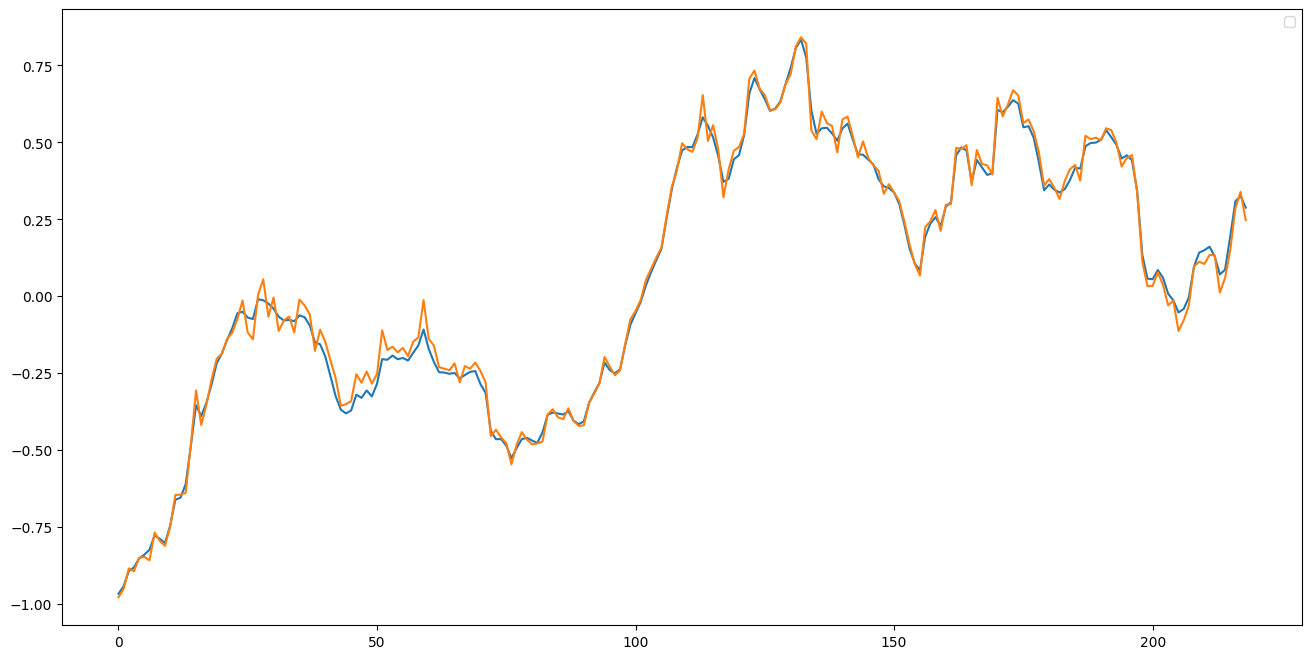

In [ ]:
predicted_train = model.predict(trainX)


plt.figure(figsize=(16,8))
plt.plot(predicted_train[:,-1].reshape(-1))

plt.legend()
plt.plot(trainY)

In [ ]:
import statistics
predictions = []
latest_prices = trainX

general_prediction = model.predict(latest_prices)[-1]

x,y,z = latest_prices.shape
for i in range(60):
    
    prediction = model.predict(latest_prices)[-1][0]
    predictions.append(prediction)
    print(prediction)
    temp_array = latest_prices[1:,:,:]
    last_row = temp_array[-1,:,:]
    temp_row = np.zeros(last_row.shape)
    

    
    for i in range(z-1):
        temp_row[0][i] = last_row[0][i+1]
    
    temp_row[0][-1] = prediction
    # print(temp_row)
    # temp_row_reshaped = temp_row.reshape(1, temp_row.shape[0], 1)
    latest_prices = np.concatenate([latest_prices, temp_row[np.newaxis, :, :]], axis=0)
    # print(temp_row[0,-3:])

    

7/7 [==============================] - 0s 993us/step
0.28787255
7/7 [==============================] - 0s 1ms/step
0.265661
7/7 [==============================] - 0s 1ms/step
0.23090377
7/7 [==============================] - 0s 1ms/step
0.23444659
7/7 [==============================] - 0s 1ms/step
0.20044169
7/7 [==============================] - 0s 1ms/step
0.16799268
8/8 [==============================] - 0s 1ms/step
0.1806656
8/8 [==============================] - 0s 1ms/step
0.16320446
8/8 [==============================] - 0s 1ms/step
0.14226817
8/8 [==============================] - 0s 1ms/step
0.13754188
8/8 [==============================] - 0s 964us/step
0.09689768
8/8 [==============================] - 0s 948us/step
0.046634685
8/8 [==============================] - 0s 1ms/step
0.024088591
8/8 [==============================] - 0s 1ms/step
0.024012312
8/8 [==============================] - 0s 1ms/step
0.009709656
8/8 [==============================] - 0s 1ms/step
0.008644816


In [ ]:
print((((np.array(predictions)).reshape(-1))).reshape(-1, 1))
predicted_prices = scaler.inverse_transform((((np.array(predictions)).reshape(-1))).reshape(-1, 1))
sequence_prediction = scaler.inverse_transform(general_prediction.reshape(-1, 1))



[[ 0.28787255]
 [ 0.265661  ]
 [ 0.23090377]
 [ 0.23444659]
 [ 0.20044169]
 [ 0.16799268]
 [ 0.1806656 ]
 [ 0.16320446]
 [ 0.14226817]
 [ 0.13754188]
 [ 0.09689768]
 [ 0.04663469]
 [ 0.02408859]
 [ 0.02401231]
 [ 0.00970966]
 [ 0.00864482]
 [-0.00508108]
 [-0.01359593]
 [-0.02219801]
 [-0.08257498]
 [-0.12927417]
 [-0.1510559 ]
 [-0.16253501]
 [-0.21526963]
 [-0.2545491 ]
 [-0.3188305 ]
 [-0.37279153]
 [-0.38703275]
 [-0.42262426]
 [-0.4547013 ]
 [-0.48538715]
 [-0.47626546]
 [-0.50073695]
 [-0.49759609]
 [-0.5111062 ]
 [-0.5071649 ]
 [-0.51099414]
 [-0.5039559 ]
 [-0.5220242 ]
 [-0.505716  ]
 [-0.46812806]
 [-0.4446128 ]
 [-0.46400836]
 [-0.44009084]
 [-0.40240714]
 [-0.41519117]
 [-0.41677305]
 [-0.43254784]
 [-0.3967191 ]
 [-0.34637213]
 [-0.32396764]
 [-0.32263315]
 [-0.27037424]
 [-0.20166443]
 [-0.18032521]
 [-0.18183091]
 [-0.19096148]
 [-0.1937432 ]
 [-0.16612676]
 [-0.16517487]]


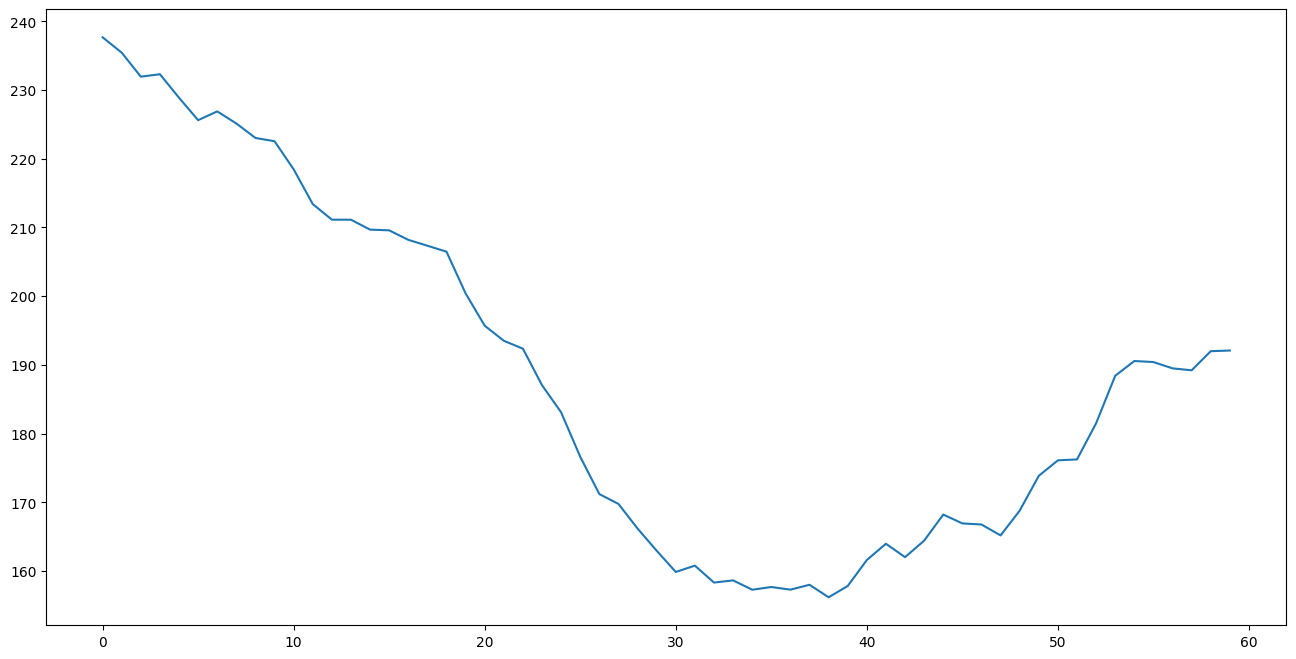

In [ ]:




plt.figure(figsize=(16,8))
# plt.plot(sequence_prediction)
plt.plot(predicted_prices)


(429, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


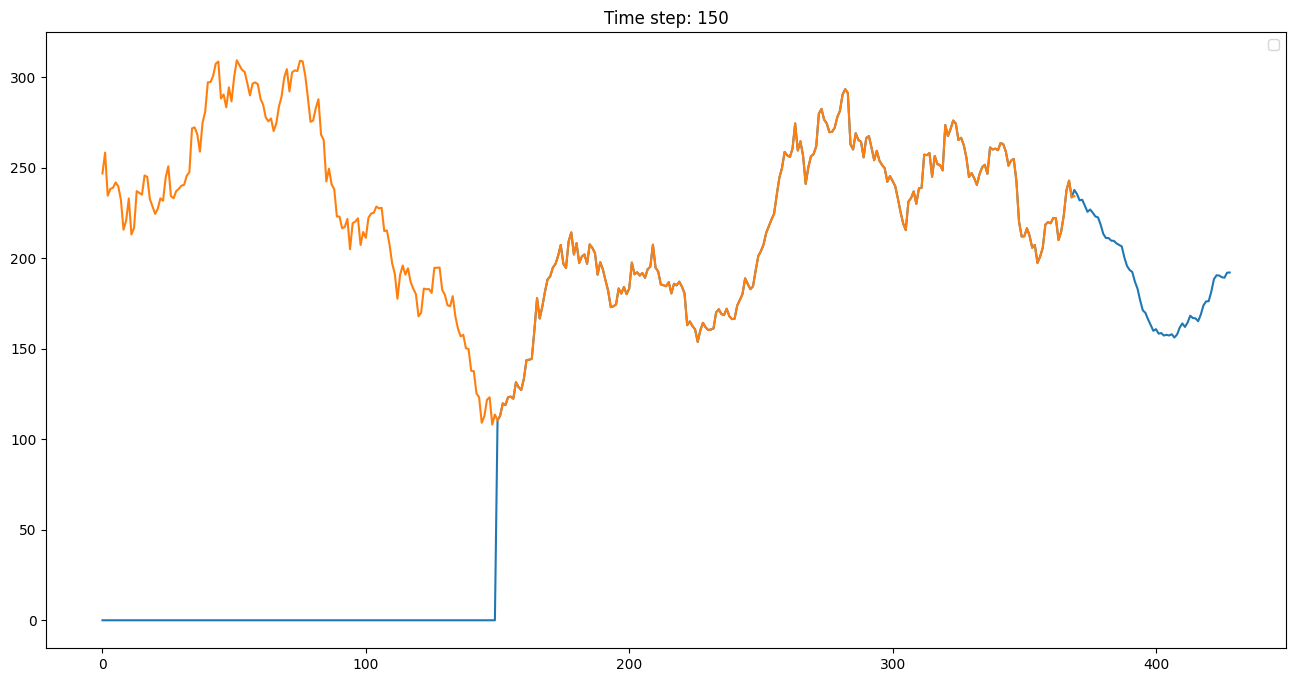

In [ ]:
plt.figure(figsize = (16,8))
empty_array = np.zeros((window,1))

previous_prices = scaler.inverse_transform(trainY.reshape(-1, 1))
previous_prices_vstacked = np.vstack((empty_array,previous_prices,predicted_prices))


print(previous_prices_vstacked.shape)

plt.plot(previous_prices_vstacked)
plt.plot(close_real_prices)

title = "Time step: "+str(window)
plt.title(title)
plt.legend()
plt.show()

In [ ]:
max = np.max(predicted_prices)
min = np.min(predicted_prices)
initial = close_real_prices[-1]

target_long  = initial + 0.85*(max - initial)
target_short = initial - 0.85*(initial - min)

print(initial, target_long,target_short)

[234.30000305] [237.16692429] [167.90576324]
